In [2]:
from transformers import AutoTokenizer, AutoModelWithLMHead
import pandas as pd
from tqdm import tqdm

In [3]:
tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")
model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

C:\Users\mccak\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\models\auto\modeling_auto.py:998: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


## TRANSCRIPTION

In [2]:
df_trans = pd.read_csv("data/final_video_transcription.csv")
df_trans.head(5)

,title,video_id,url,channel,parent_id,parent,depth,lang,transcript
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,it's just before dawn on the Philippine islan...
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,u.s border para maker nike is facing a backla...
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,Translator: Rhonda Jacobs Reviewer: Tanya Cush...
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,look at this okay so here's a trail and the t...
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,hello so in just a few minutes um elon musk ...


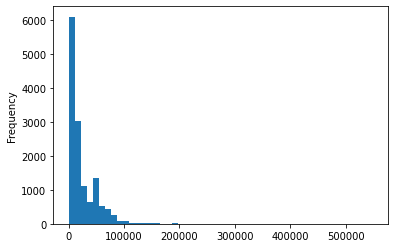

In [3]:
df = df_trans["transcript"].str.len()
df.plot.hist(bins=50);

In [6]:
def get_emotion(text):
    input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

    output = model.generate(input_ids=input_ids,
               max_length=2)
    dec = [tokenizer.decode(ids) for ids in output]
    label = dec[0]
    # remove pad
    return label[6:]

In [12]:
def concanate_emotions(df, attr, title, limit = 20000):
    emotions = []
    for text in tqdm(df[attr]):
        if len(text) <= limit :
            emotions.append(get_emotion(text))
        else:
            emotions.append(get_emotion(attr[:text]))
            
    df['emotion'] = emotions
    df.to_csv("data/" + title, index=False)

In [ ]:
concanate_emotions(df_trans, 'transcript', 'final_video_transcription_with_emotion.csv')

## DESCRIPTION

In [34]:
df_desc = pd.read_csv("data/video_desc.csv")
df_desc

,title,video_id,url,channel,parent_id,parent,depth,lang,description
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en,Countries from around the world have insisted ...
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,A furious China is lashing out against global ...
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en,What do you do when someone just doesn't like ...
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,How do these rocks move on their own in the de...
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en,In this unedited conversation with head of TED...
...,...,...,...,...,...,...,...,...,...
14257,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,How do you bring out the best in yourself? Acc...
14258,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en,Why are we constantly holding ourselves back f...
14259,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Designers spend their days dreaming up better ...
14260,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en,Meet Shaolin Master Shi Heng Yi in his serene ...


In [35]:
concanate_emotions(df_desc, 'description', 'video_desc_with_emotion.csv')

100%|██████████████████████████████████████████████████████████████████████████| 14262/14262 [2:05:40<00:00,  1.89it/s]


## TITLE

In [36]:
df_title = pd.read_excel("data/depth_documents.xlsx")
df_title

,title,video_id,url,channel,parent_id,parent,depth,lang
0,China Navy to BBC: 'Stay away from islands' - ...,LVeKbEgn50o,https://www.youtube.com/watch?v=LVeKbEgn50o,BBC News,nbBsh46aSz4,https://www.youtube.com/watch?v=nbBsh46aSz4,1,en
1,"Nike, H&M face backlash in China over Uighur s...",qC_qOoBFsMc,https://www.youtube.com/watch?v=qC_qOoBFsMc,DW News,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en
2,What do you do when someone just doesn't like ...,Y4gly9n9RBo,https://www.youtube.com/watch?v=Y4gly9n9RBo,TEDx Talks,s_eNkqwp_LA,https://www.youtube.com/watch?v=s_eNkqwp_LA,1,en
3,99 Years Later... We Solved It,JFFhD5HeByM,https://www.youtube.com/watch?v=JFFhD5HeByM,Physics Girl,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en
4,"Elon Musk talks Twitter, Tesla and how his bra...",cdZZpaB2kDM,https://www.youtube.com/watch?v=cdZZpaB2kDM,TED,tcKw5jiT6wg,https://www.youtube.com/watch?v=tcKw5jiT6wg,1,en
...,...,...,...,...,...,...,...,...
14327,The art of focus – a crucial ability | Christi...,xF80HzqvAoA,https://www.youtube.com/watch?v=xF80HzqvAoA,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en
14328,Why We Fear And Hold Back From What We Want | ...,tFDRXgDUea4,https://www.youtube.com/watch?v=tFDRXgDUea4,TEDx Talks,4AzpmZ7AjaQ,https://www.youtube.com/watch?v=4AzpmZ7AjaQ,5,en
14329,5 steps to designing the life you want | Bill ...,SemHh0n19LA,https://www.youtube.com/watch?v=SemHh0n19LA,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en
14330,Master Shi Heng Yi – 5 hindrances to self-mast...,4-079YIasck,https://www.youtube.com/watch?v=4-079YIasck,TEDx Talks,vj-91dMvQQo,https://www.youtube.com/watch?v=vj-91dMvQQo,5,en


In [37]:
concanate_emotions(df_title, 'title', 'depth_doc_with_emotion.csv')

100%|████████████████████████████████████████████████████████████████████████████| 14332/14332 [14:56<00:00, 15.99it/s]
